In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt 

In [48]:
from google.colab import files
uploaded = files.upload()

Saving apple.jpeg to apple.jpeg
Saving orange.jpeg to orange.jpeg


In [18]:
def GaussianFilter(numRows, numCols, sigma, highPass=True):
   centerI = int(numRows/2) + 1 if numRows % 2 == 1 else int(numRows/2)
   centerJ = int(numCols/2) + 1 if numCols % 2 == 1 else int(numCols/2)

   def gaussian(i,j):
      coefficient = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
      return 1 - coefficient if highPass else coefficient

   return np.array([[gaussian(i,j) for j in range(numCols)] for i in range(numRows)])


def DFTfilter(image, filter):
   shiftedDFT = np.fft.fftshift(np.fft.fft2(image))

   filteredDFT = shiftedDFT * filter

   imgBack = np.fft.ifft2(np.fft.ifftshift(filteredDFT))
   return imgBack

def lowPassFilter(image, sigma):
   rows, cols = image.shape
   return DFTfilter(image, GaussianFilter(rows, cols, sigma, highPass=False))


def highPassFilter(image, sigma):
   rows,cols = image.shape
   return DFTfilter(image, GaussianFilter(rows, cols, sigma, highPass=True)) 

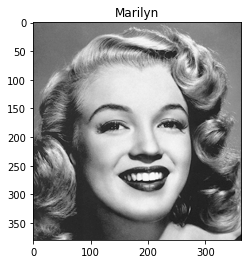

In [22]:
marilyn = cv2.imread('/content/marilyn.png')
marilyn = cv2.cvtColor(marilyn, cv2.COLOR_BGR2GRAY)
plt.imshow(marilyn, cmap = 'gray')
plt.title('Marilyn')
plt.show()

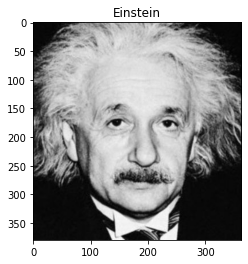

In [16]:
einstein = cv2.imread('/content/einstein.png')
einstein=cv2.cvtColor(einstein, cv2.COLOR_BGR2GRAY)
plt.imshow(einstein, cmap= 'gray')
plt.title('Einstein')
plt.show()

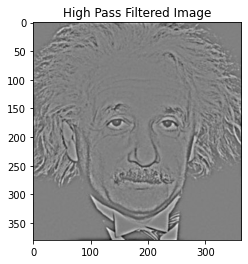

In [59]:
highPassImage = np.real(highPassFilter(einstein,20))

plt.imshow(highPassImage, cmap= 'gray')
plt.title('High Pass Filtered Image')
plt.show()


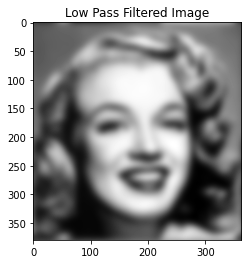

In [60]:
lowPassImage = np.real(lowPassFilter(marilyn, 10))
plt.imshow(lowPassImage, cmap= 'gray')
plt.title('Low Pass Filtered Image')
plt.show()

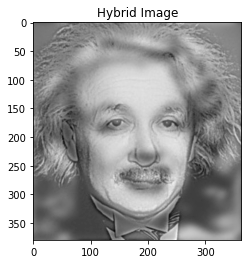

In [61]:
hybridImage= lowPassImage+highPassImage

plt.imshow(hybridImage, cmap= 'gray')
plt.title('Hybrid Image')
plt.show()